In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
font1 = {'weight' : 'normal','size': 23}
font2 = {'weight' : 'normal','size': 18}

In [2]:
path = r'./out_21746.log'

In [3]:
with open(path, 'r', encoding='utf-8') as f:
    logs = f.read().splitlines()

logs里是运行下面代码的输出
```python
import os

print("Train the model", flush=True)
os.system("python RGAN.py --settings_file kdd99")
print("do anomaly detection",flush=True)
os.system("python AD.py --settings_file kdd99_test")
print()
os.system("python AD_Invert.py --settings_file kdd99_test")
```

# 训练时

Generated/loaded 56235 samples from data-type kdd99  
samples_size: (56235, 30, 6)  
num_variables: 6  

In [4]:
train_logs = []
for log in logs:
    if "do anomaly detection" not in log:
        train_logs.append(log)
    else:
        break

In [5]:
len(train_logs)

354

In [24]:
epoch, D_loss_curr, G_loss_curr, seq_length = [], [], [], []
line = 53
for i in range(100):
    epoch.append(float(train_logs[line].split('\t')[0]))
    D_loss_curr.append(float(train_logs[line].split('\t')[1]))
    G_loss_curr.append(float(train_logs[line].split('\t')[2]))
    seq_length.append(float(train_logs[line].split('\t')[3]))
    line += 3
print(epoch,'\n')
print(D_loss_curr,'\n')
print(G_loss_curr,'\n')
print(seq_length,'\n')

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0] 

[0.0304, 0.3714, 0.0769, 0.0362, 0.0329, 0.0453, 0.0303, 0.1301, 0.0361, 0.0812, 0.0455, 0.0339, 0.0571, 0.0411, 0.0385, 0.0316, 0.0261, 0.0758, 0.021, 0.0321, 0.0392, 0.033, 0.0247, 0.0218, 0.0199, 0.0189, 0.0183, 0.0204, 0.0144, 0.0156, 0.0146, 0.015, 0.0146, 0.0127, 0.0131, 0.0134, 0.0107, 0.0112, 0.0125, 0.0123, 0.0121, 0.0112, 0.011, 0.01, 0.01, 0.0091, 0.0083, 0.0076, 0.0086, 0.0081, 0.0069, 0.007,

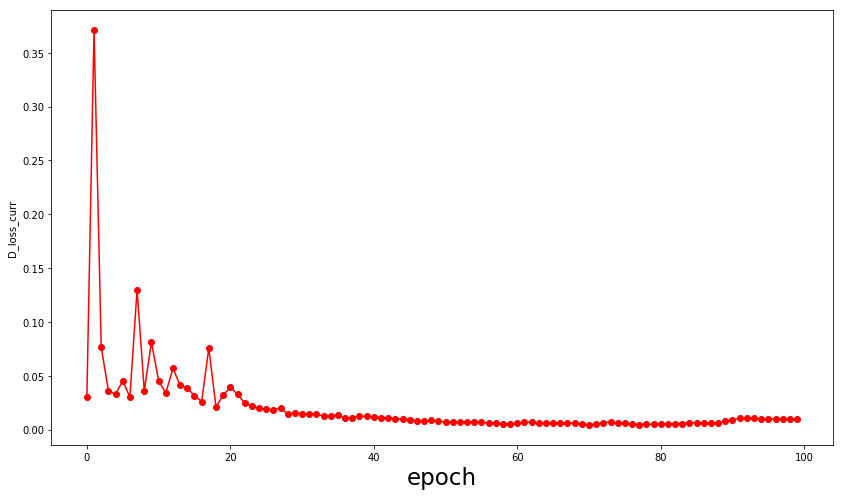

In [7]:
plt.figure(figsize=(14,8))
plt.plot(epoch, D_loss_curr, 'o-', color='red')
plt.xlabel("epoch", font1)
plt.ylabel("D_loss_curr")
plt.show()

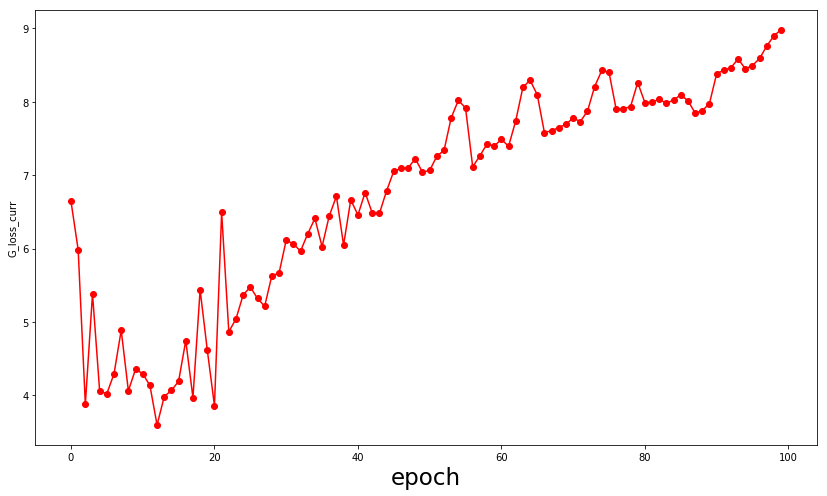

In [8]:
plt.figure(figsize=(14,8))
plt.plot(epoch, G_loss_curr, 'o-', color='red')
plt.xlabel("epoch", font1)
plt.ylabel("G_loss_curr")
plt.show()

# 测试时

Generated/loaded 49399 samples from data-type kdd99_test

In [9]:
comb_logits_based_epoch, tao_1, accu_1, pre_1, rec_1, f1_1, n_1 = [], [], [], [], [], [], []
comb_statistic_based_epoch, tao_2, accu_2, pre_2, rec_2, f1_2, n_2 = [], [], [], [], [], [], []
sample_wise_epoch, tao_3, accu_3, pre_3, rec_3, f1_3, n_3 = [], [], [], [], [], [], []

for i, log in enumerate(logs):
    if "Comb-logits-based-Epoch:" in log:
        comb_logits_based_epoch.append(float(log.split(";")[0].split(" ")[-1]))
        tao_1.append(float(log.split("tao=")[-1].split(";")[0]))
        accu_1.append(float(log.split("Accu: ")[-1].split(";")[0]))
        pre_1.append(float(log.split("Pre: ")[-1].split(";")[0]))
        rec_1.append(float(log.split("Rec: ")[-1].split(";")[0]))
        f1_1.append(float(log.split("F1: ")[-1].split(";")[0]))
        n_1.append(float(logs[i-2].split("N: ")[-1]))
    elif "Comb-statistic-based-Epoch:" in log:
        comb_statistic_based_epoch.append(float(log.split(";")[0].split(" ")[-1]))
        tao_2.append(float(log.split("tao=")[-1].split(";")[0]))
        accu_2.append(float(log.split("Accu: ")[-1].split(";")[0]))
        pre_2.append(float(log.split("Pre: ")[-1].split(";")[0]))
        rec_2.append(float(log.split("Rec: ")[-1].split(";")[0]))
        f1_2.append(float(log.split("F1: ")[-1].split(";")[0]))
        n_2.append(float(logs[i-2].split("N: ")[-1]))
    elif "sample-wise-Epoch:" in log:
        sample_wise_epoch.append(float(log.split(";")[0].split(" ")[-1]))
        tao_3.append(float(log.split("tao=")[-1].split(";")[0]))
        accu_3.append(float(log.split("Accu: ")[-1].split(";")[0]))
        pre_3.append(float(log.split("Pre: ")[-1].split(";")[0]))
        rec_3.append(float(log.split("Rec: ")[-1].split(";")[0]))
        f1_3.append(float(log.split("F1: ")[-1].split(";")[0]))

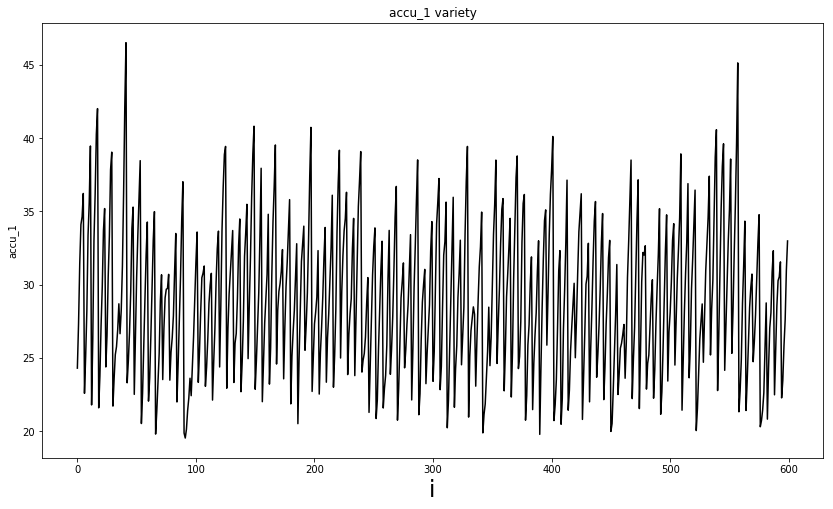

In [10]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(len(accu_1)), accu_1, color='black')
plt.xlabel("i", font1)
plt.title("accu_1 variety")
plt.ylabel("accu_1")
plt.show()

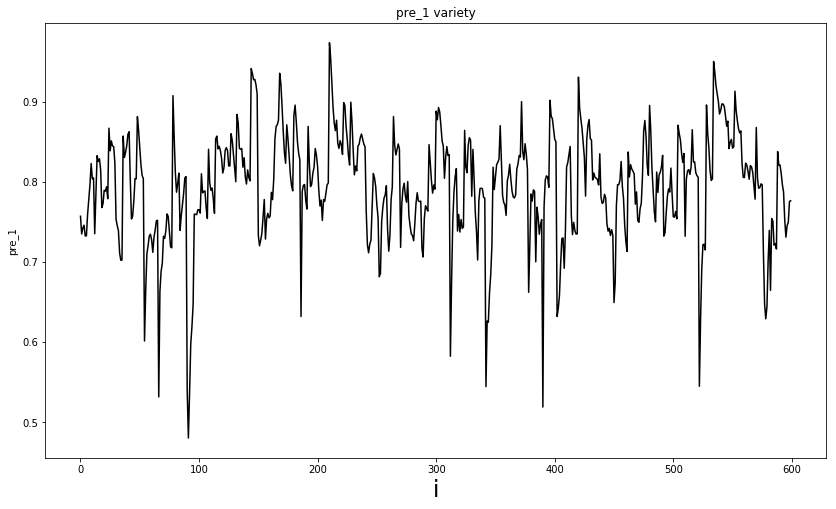

In [11]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(len(pre_1)), pre_1, color='black')
plt.xlabel("i", font1)
plt.title("pre_1 variety")
plt.ylabel("pre_1")
plt.show()

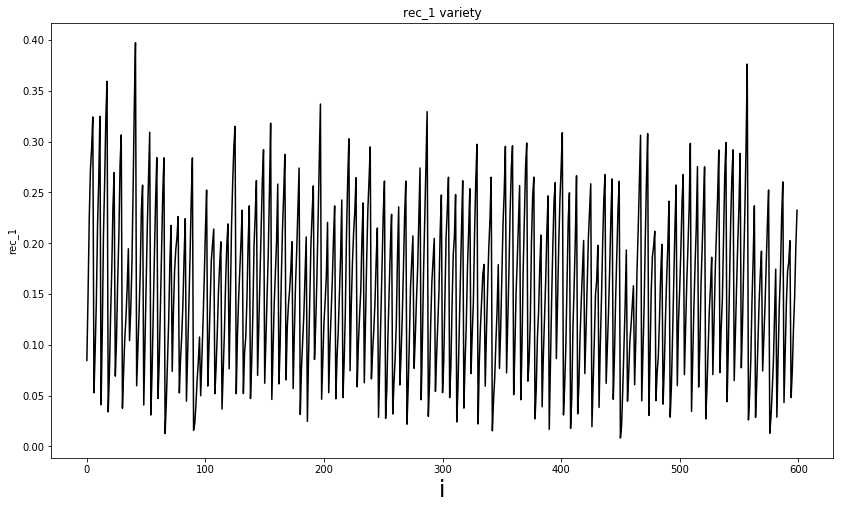

In [12]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(len(rec_1)), rec_1, color='black')
plt.xlabel("i", font1)
plt.title("rec_1 variety")
plt.ylabel("rec_1")
plt.show()

<Figure size 1152x1152 with 0 Axes>

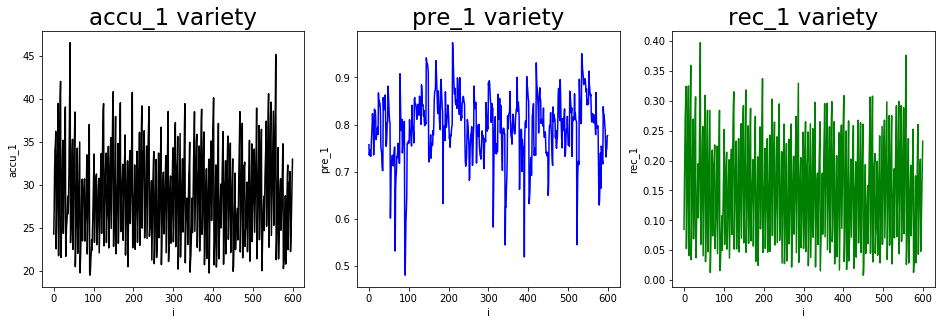

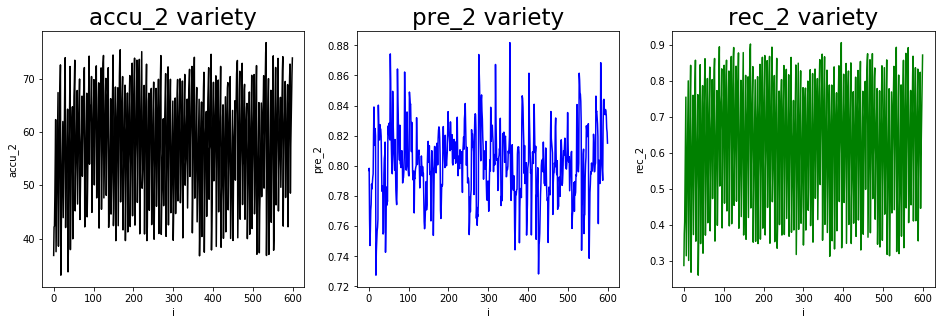

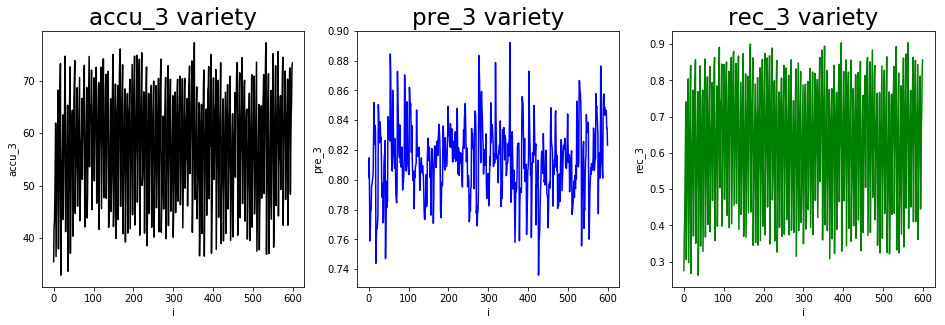

In [20]:
plt.figure(figsize=(16,16))
acc = [accu_1,accu_2, accu_3]
pre = [pre_1, pre_2, pre_3]
rec = [rec_1, rec_2, rec_3]
for i in range(1, 4, 1):
    plt.figure(figsize=(16,16))
    plt.subplot(3,3,(i-1)*3+1)
    plt.plot(np.arange(len(accu_1)), acc[i-1], color='black')
    plt.xlabel("i")
    plt.title("accu_{} variety".format(i), font1)
    plt.ylabel("accu_{}".format(i))
    
    plt.subplot(3,3,(i-1)*3+2)
    plt.plot(np.arange(len(pre_1)), pre[i-1], color='blue')
    plt.xlabel("i")
    plt.title("pre_{} variety".format(i), font1)
    plt.ylabel("pre_{}".format(i))
    
    plt.subplot(3,3,(i-1)*3+3)
    plt.plot(np.arange(len(rec_1)), rec[i-1], color='green')
    plt.xlabel("i")
    plt.title("rec_{} variety".format(i) , font1)
    plt.ylabel("rec_{}".format(i))
    
    plt.show()